<a href="https://colab.research.google.com/github/AmantayAbdurakhmanov/misc/blob/master/traffic_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install schedule

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1 unique of total 1 retrieved shots saved at 2020-03-17 07:04:22+13:00


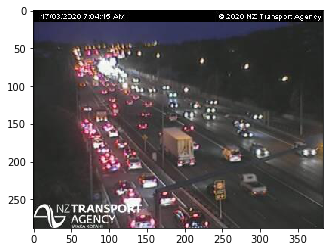

2 unique of total 3 retrieved shots saved at 2020-03-17 07:05:25+13:00


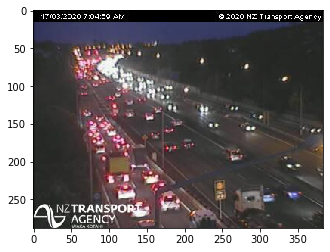

3 unique of total 5 retrieved shots saved at 2020-03-17 07:06:27+13:00


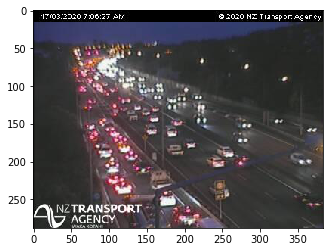

4 unique of total 7 retrieved shots saved at 2020-03-17 07:07:30+13:00


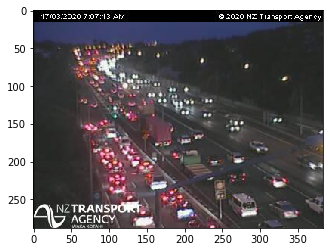

5 unique of total 8 retrieved shots saved at 2020-03-17 07:08:01+13:00


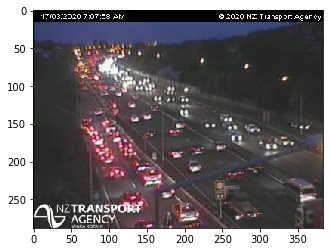

1 unique of total 1 retrieved shots saved at 2020-03-17 07:38:34+13:00


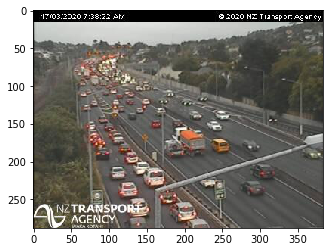

2 unique of total 2 retrieved shots saved at 2020-03-17 07:39:05+13:00


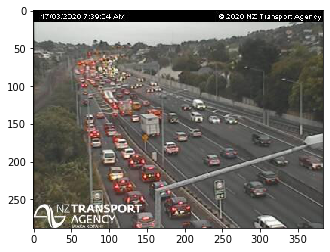

In [ ]:
import numpy as np
import requests
from matplotlib.image import imread as imread
from matplotlib.image import imsave as imsave
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import pytz
import time
import os
import schedule

def collect_shots(n):
  
  imgurl ="https://www.trafficnz.info/camera/80.jpg"
  imprev = np.empty(2)
  icnt = 0
  tcnt = 0
  tz_NZ = pytz.timezone('Pacific/Auckland') 

  hour_fold = '/content/drive/My Drive/80/' + '{}'.format(datetime.now(tz_NZ).strftime("%H"));
  os.makedirs(hour_fold, exist_ok=True)
  while icnt < n:  
    response = requests.get(imgurl, stream=True)
    response.raw.decode_content = True

    img=imread(response.raw, format = response.headers['Content-Type'])
    tcnt+=1
    if (imprev is None) | (np.array_equal(img, imprev)==False):
      imprev = img
      icnt+=1
      plt.imshow(img)
      dtime = datetime.now(tz_NZ).replace(microsecond=0)
      imsave('{}/{}.jpg'.format(hour_fold, dtime),img)
      print('{} unique of total {} retrieved shots saved at {}'.format(icnt, tcnt, dtime))
      plt.show()
    time.sleep(30)

schedule.every(30).minutes.do(collect_shots, 5).tag('half-hour')
#schedule.every().hour.at(':34').do(collect_shots, 5).tag('hour:min')
#schedule.clear('half-hour')
#schedule.clear('hour:min')


while True:
    schedule.run_pending()
    time.sleep(60) # wait one minute

In [ ]:
#import shutil
#for h in range(24):
#  shutil.rmtree('/content/drive/My Drive/80/'+str(h).rjust(2, '0'), ignore_errors=True) 

# New Section